# Allan Sasi

# *The Sparks Foundation*
## Exploratory Data Analysis Task
Trying to find out the weak areas and other problems of business to make more profit.

### Python Libraries being used:-
#### A.Data analysis

In [1]:
import pandas as pd
import numpy as np

#### B. Data Visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exraction or Loading Data
- Importing dataset.
- 1 files:-
    - SampleSuperstore data -- our training file.

In [3]:
data = pd.read_csv("SampleSuperstore.csv")
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
shape = data.shape
shape

(9994, 13)

In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Data Cleaning

In [8]:
data.duplicated().sum()

17

## DATA VISUALIZATION
Plotting data points on 2-D graph to find any relationship between the data

#### Total Sales and Profits of the company

In [9]:
SnP = data.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(SnP,2)

Sales     2297200.86
Profit     286397.02
dtype: float64

In [10]:
maxSales = data.groupby("State").Sales.sum().nlargest(n =10)
maxSales.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')

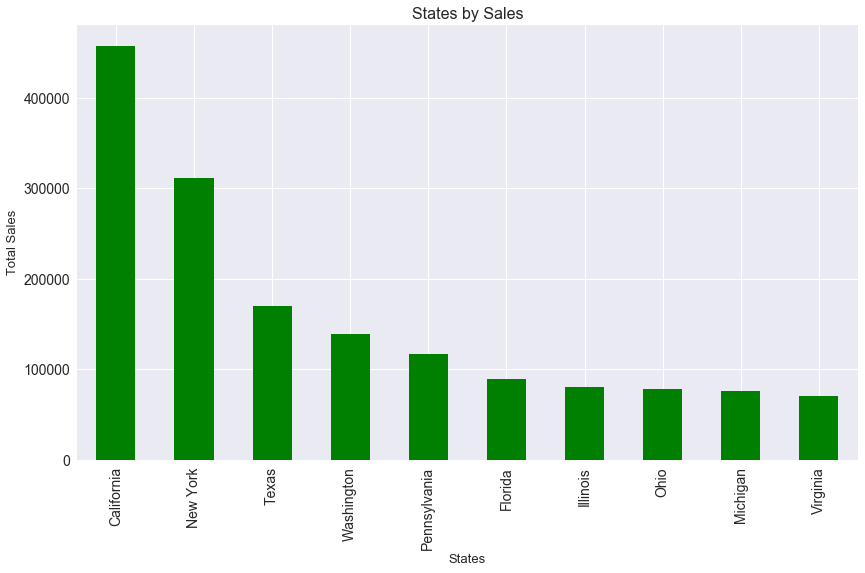

In [11]:
plt.style.use('seaborn')
maxSales.plot(kind ='bar', figsize =(14,8), fontsize =14, color='green')
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("States by Sales",fontsize =16)
plt.show()

In [12]:
maxProfits = data.groupby("State").Profit.sum().nlargest(n =10)
maxProfits.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

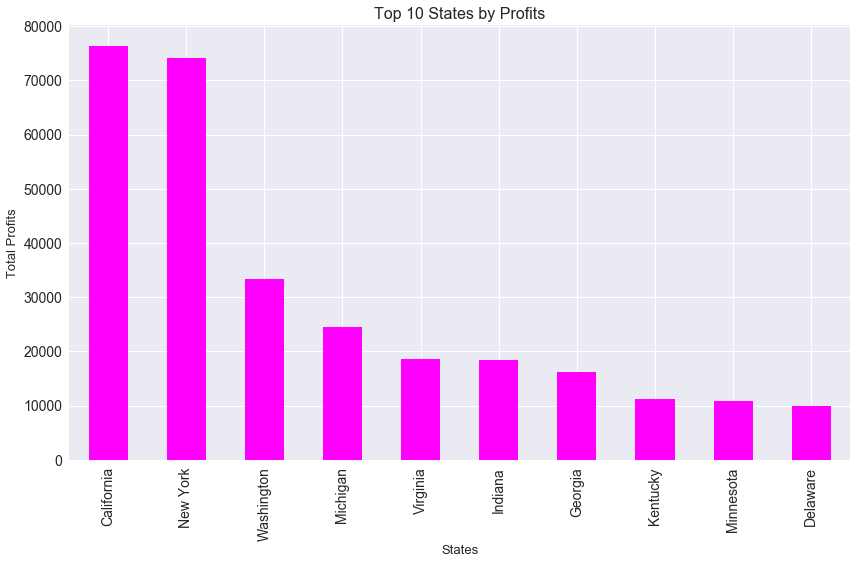

In [13]:
plt.style.use('seaborn')
maxProfits.plot(kind ='bar', figsize =(14,8), fontsize =14, color='magenta')
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top 10 States by Profits",fontsize =16)
plt.show()

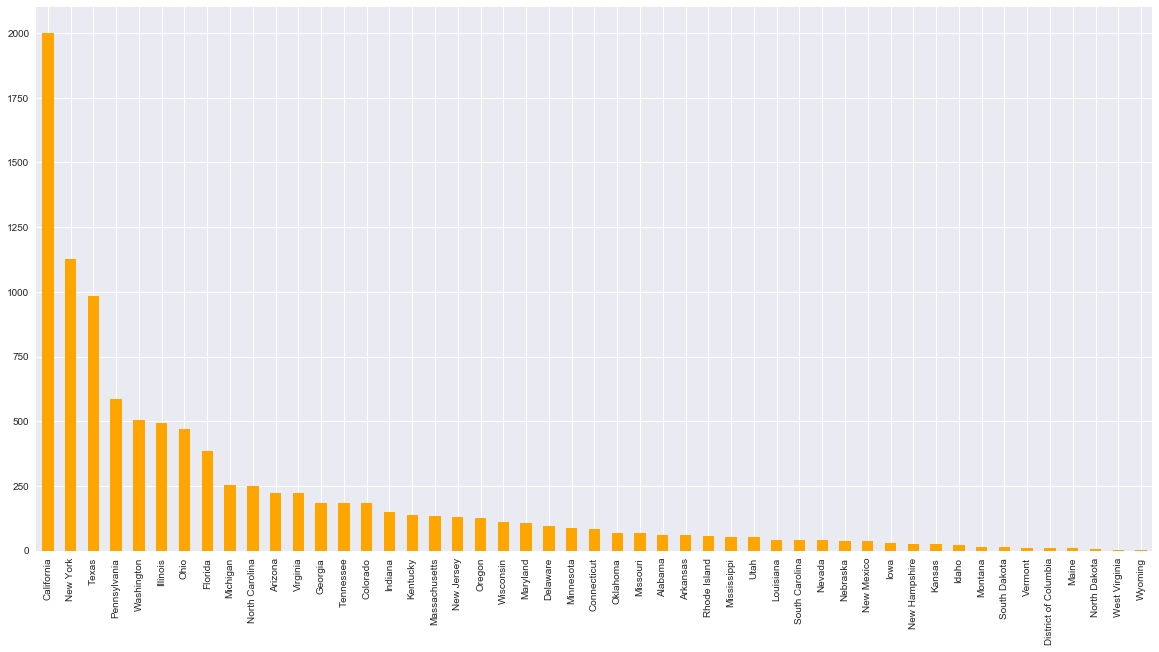

In [14]:
data['State'].value_counts().plot(kind='bar', figsize=(20,10), color='orange')

#### Region-wise

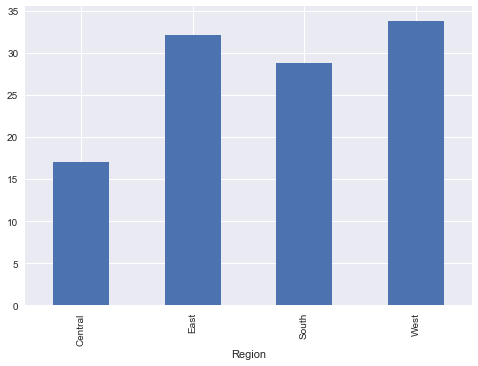

In [15]:
data.groupby(data['Region'])['Profit'].mean().plot.bar()

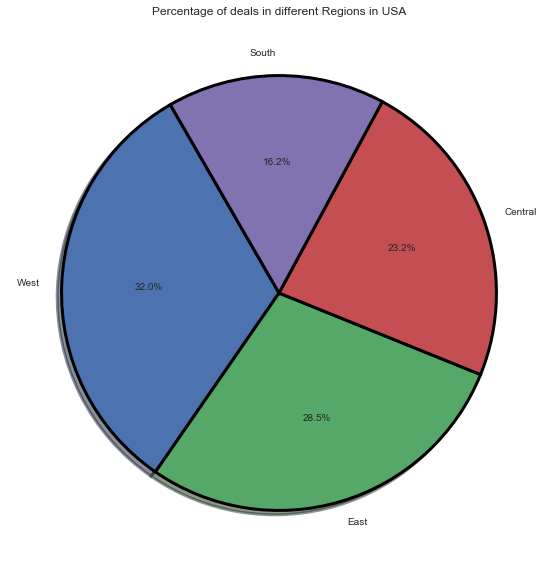

In [16]:
fig = plt.figure(figsize=(25,10))
plt.pie(data['Region'].value_counts(), labels=data['Region'].value_counts().index,autopct='%1.1f%%', shadow=True,  startangle=120, wedgeprops={'linewidth':3,'edgecolor':"black"})
plt.title('Percentage of deals in different Regions in USA')
plt.show()

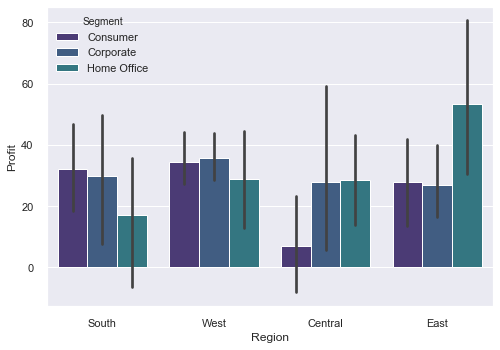

In [17]:
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = data , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()

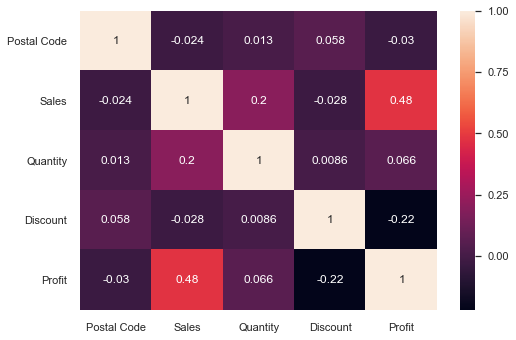

In [18]:
corr= data.corr()
corr
sns.heatmap(corr, annot= True)

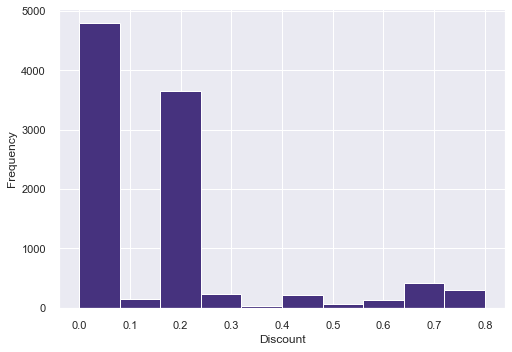

In [19]:
plt.hist(data['Discount'], bins=10)
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

#### Using PairPlot to find Relations

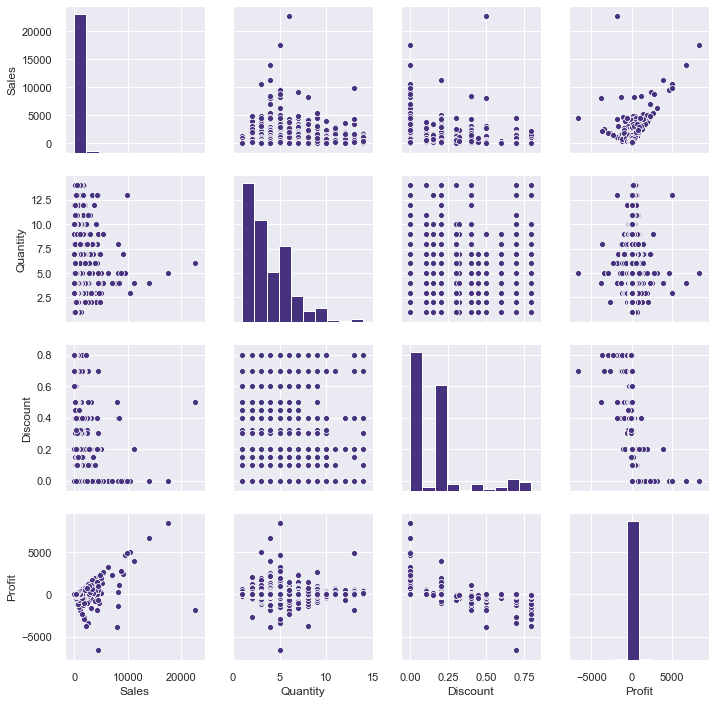

In [20]:
rel = data.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(rel)

Sales-Profit & Discount-Profit can be assumed to be present.

Checking in depth.

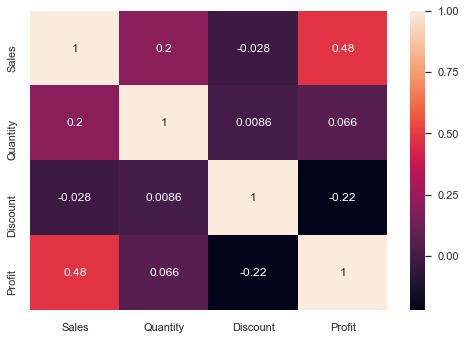

In [21]:
corr=rel.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

Sales-Profit -> Positive

Discount-Profit -> Negative

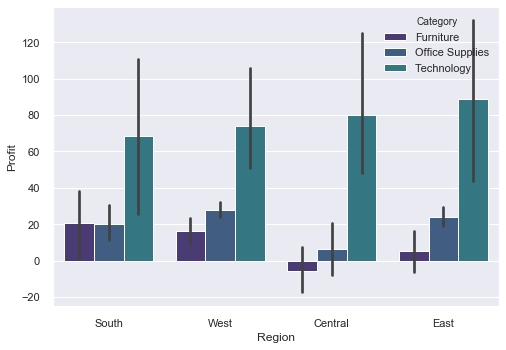

In [22]:
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = data , x = "Region",y = "Profit" ,hue = "Category")
plt.show()

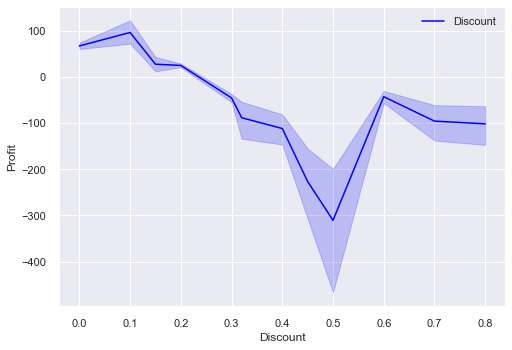

In [23]:
sns.lineplot('Discount', 'Profit', data = data, color = 'b', label= 'Discount')
plt.legend()

#### Catogory wise Business Distribution

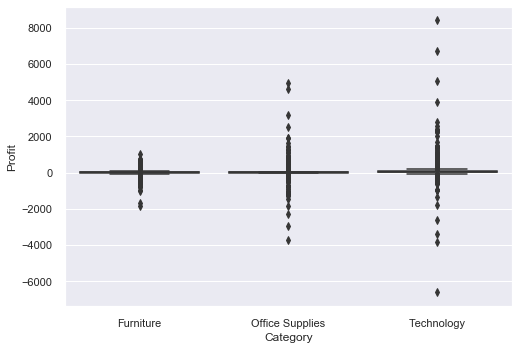

In [24]:
sns.boxplot(x='Category',y='Profit',data=data)

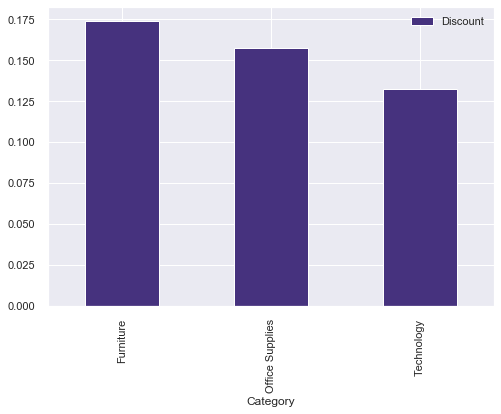

In [25]:
pDisc=pd.pivot_table(data,index='Category',values='Discount')
pDisc.plot(kind='bar')

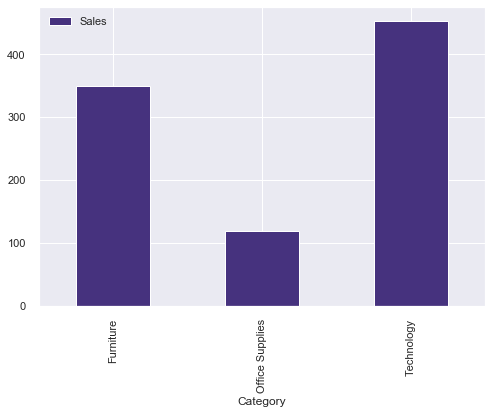

In [26]:
pSale=pd.pivot_table(data,index='Category',values='Sales')
pSale.plot(kind='bar')

## Maximize Sales & Minimize Discounts